In [1]:
import numpy as np
from sklearn import cluster, datasets
from scipy import misc
%pylab inline
from pylab import *
import random as pyrandom
from scipy.spatial.distance import cdist
matplotlib.rc("image",cmap="gray")
from collections import Counter

Populating the interactive namespace from numpy and matplotlib


In [35]:
type(misc.face())

numpy.ndarray

In [3]:
img_data = misc.face()

In [4]:
#print(img_data[pyrandom.sample(range(len(img_data)), len(img_data))])
data = img_data[pyrandom.sample(range(len(img_data)), len(img_data))]

In [6]:
row = data.shape[0]
col = data.shape[1]
new_dt = data.reshape(row*col, 3)

In [7]:
new_dt

array([[162, 156, 170],
       [153, 147, 161],
       [144, 138, 152],
       ...,
       [107, 146,  99],
       [107, 146,  99],
       [107, 146,  99]], dtype=uint8)

In [9]:
protos = array([[30,30,40],[40,20,30],[0,90, 20],[50,50, 50]])
start = protos.copy()

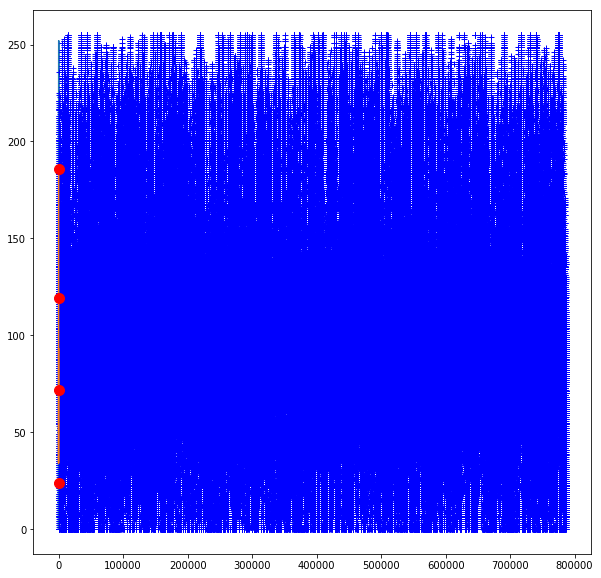

In [37]:
figsize(10,10)
plot(new_dt[:,0],new_dt[:,1],new_dt[:,2],'b+')
plot(protos[:,0],protos[:,1],protos[:,2],'ro',markersize=10)

In [11]:
new_dt.shape

(786432, 3)

In [17]:
len(protos)#.shape

4

In [29]:
protos[:, 2]

array([40, 30, 20, 50])

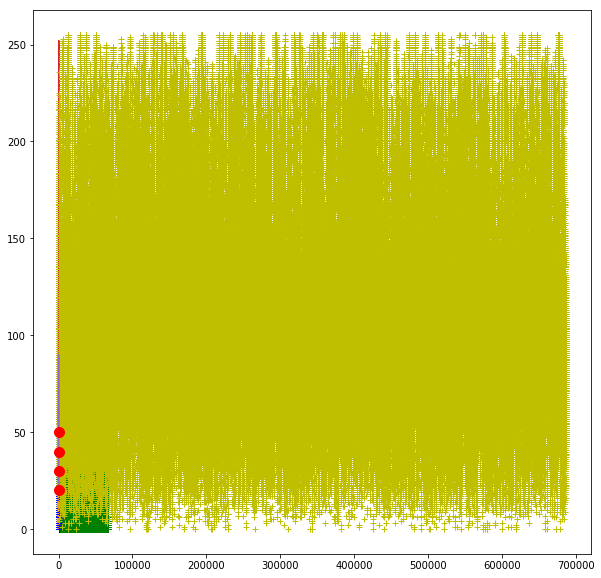

In [30]:
figsize(10,10)
dists = cdist(protos, new_dt) #should be scipy lib #eclulient dist
#print(dists)
closest = argmin(dists, axis=0) # closest from single point in closest cluster
#print(closest[3])
for i in range(len(protos)):
    plot(new_dt[closest==i, 0], new_dt[closest==i, 1], new_dt[closest==i, 2] , ['c+','g+','b+','y+'][i])
plot(protos[:, 0],protos[:, 1], protos[:, 2],'ro', markersize=10)

In [32]:
history = [protos.copy()]

for i in range(len(protos)):
    protos[i,:] = average(new_dt[closest==i],axis=0)
    
history.append(protos.copy())

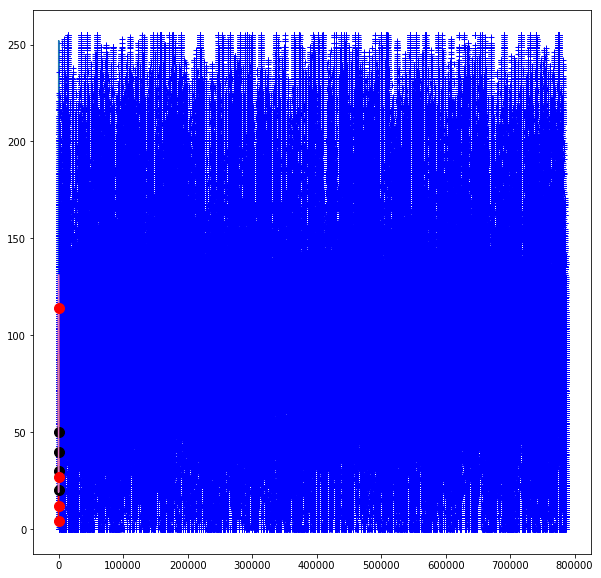

In [33]:
figsize(10,10)
plot(new_dt[:,0], new_dt[:,1], new_dt[:,2],'b+')
harray = array(history)
for i in range(len(protos)):
    plot(harray[:,i,0],harray[:,i,1],harray[:,i,2],'r')
plot(harray[0,:,0], harray[0,:,1], harray[0,:,2],'ko',markersize=10)
plot(protos[:,0],protos[:,1],protos[:,2],'ro',markersize=10)

In [34]:
for round in range(1000):
    if round%100==0: sys.stderr.write("%d "%round)
    dists = cdist(protos,new_dt)
    closest = argmin(dists,axis=0)
    for i in range(len(protos)):
            protos[i,:] = average(new_dt[closest==i],axis=0)
    history.append(protos.copy())

0 100 200 300 400 500 600 700 800 900 

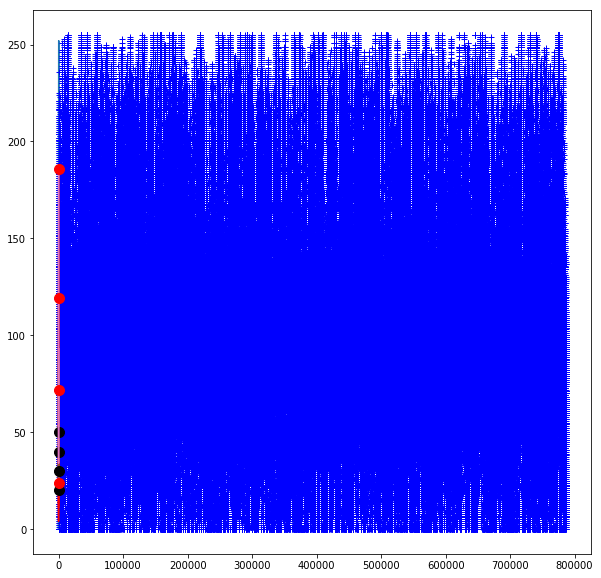

In [35]:
figsize(10,10)
plot(new_dt[:,0],new_dt[:,1],new_dt[:,2],'b+')
history = array(history)
for i in range(len(protos)):
    plot(history[:,i,0],history[:,i,1],history[:,i,2],'r')
plot(history[0,:,0],history[0,:,1],history[0,:,2],'ko',markersize=10)
plot(protos[:,0],protos[:,1],protos[:,2],'ro',markersize=10)

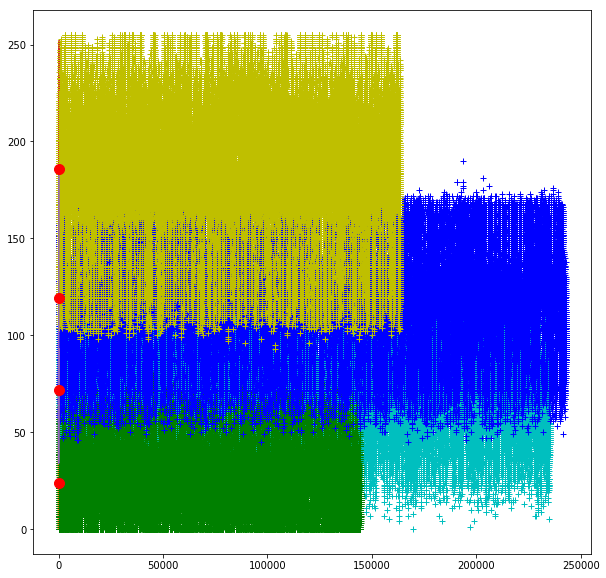

In [36]:
figsize(10,10)
dists = cdist(protos,new_dt)
closest = argmin(dists,axis=0)
for i in range(len(protos)):
  plot(new_dt[closest==i,0],new_dt[closest==i,1],new_dt[closest==i,2],['c+','g+','b+','y+'][i])
plot(protos[:,0],protos[:,1],protos[:,2],'ro',markersize=10)

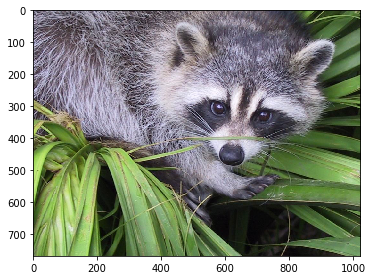

In [4]:
from skimage import io
io.imshow(img_data)
io.show()

## Using sklearn implementing Kmeans algorithm

In [44]:
#help(KMeans)

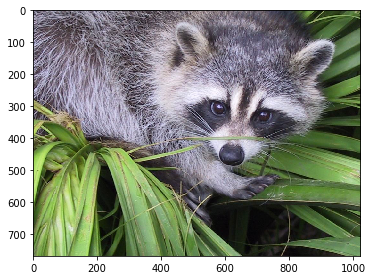

C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_io.py:140: UserWarning: compressed_misc.png is a low contrast image
  warn('%s is a low contrast image' % fname)


In [15]:
from skimage import io
from sklearn.cluster import KMeans
import numpy as np

image = img_data
rows = img_data.shape[0]
cols = img_data.shape[1]
io.imshow(image)
io.show()    
image = image.reshape(image.shape[0]*image.shape[1], 3)
kmeans = KMeans(n_clusters = 5, n_init=10, max_iter = 300)
kmeans.fit(image)
 
clusters = np.asarray(kmeans.cluster_centers_,dtype=np.uint8) 
labels = np.asarray(kmeans.labels_,dtype=np.uint8 )  
labels = labels.reshape(rows,cols); 
 
np.save('misc.npy',clusters)    
io.imsave('compressed_misc.png',labels)

C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


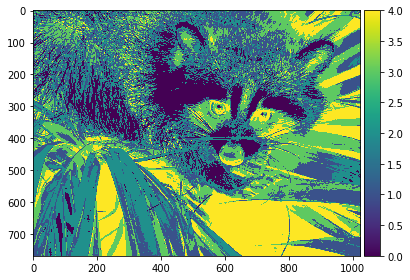

In [6]:
img = io.imread('compressed_misc.png')
io.imshow(img)
io.show()